# EDA
Julian Leonardo Avila Martinez
20212107030

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/lorey/list-of-countries/master/csv/countries.csv"
df = pd.read_csv(url, sep=";")

df.head()

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai


In [80]:
df.shape

(252, 19)

In [81]:
df.columns

Index(['alpha_2', 'alpha_3', 'area', 'capital', 'continent', 'currency_code',
       'currency_name', 'eqivalent_fips_code', 'fips', 'geoname_id',
       'languages', 'name', 'neighbours', 'numeric', 'phone', 'population',
       'postal_code_format', 'postal_code_regex', 'tld'],
      dtype='object')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alpha_2              251 non-null    object 
 1   alpha_3              252 non-null    object 
 2   area                 252 non-null    float64
 3   capital              246 non-null    object 
 4   continent            210 non-null    object 
 5   currency_code        251 non-null    object 
 6   currency_name        251 non-null    object 
 7   eqivalent_fips_code  1 non-null      object 
 8   fips                 249 non-null    object 
 9   geoname_id           252 non-null    int64  
 10  languages            249 non-null    object 
 11  name                 252 non-null    object 
 12  neighbours           165 non-null    object 
 13  numeric              252 non-null    int64  
 14  phone                247 non-null    object 
 15  population           252 non-null    int

The data shows a list of 252 countries with information about certain aspects
such as Name, Capital, Continent, Area, Codes for telephone communication,
shipping, internet extension; Languages spoken on the territory and more.

One can see that the data types seem to be consistent, being quantities the
expected features, one may expect the phone to be a number type, however due
to "+" extension it is treated as an object or string.

There is a big amount of missing data, specially for the postal services.
Some capitals are missing, some continents and neighbours are missing as well
this could be due to being island nation without a clear continent of pertinence
and the lack of land borders with other nations.

Most notably there is one one country that has an equivalent flip code.

In [83]:
df.describe()

,area,geoname_id,numeric,population
count,2.520000e+02,2.520000e+02,252.000000,2.520000e+02
mean,5.952879e+05,2.427870e+06,434.309524,2.727679e+07
std,1.904818e+06,1.632093e+06,254.663139,1.164127e+08
min,0.000000e+00,4.951800e+04,0.000000,0.000000e+00
25%,1.098000e+03,1.163774e+06,217.000000,1.879528e+05
50%,6.489450e+04,2.367967e+06,436.000000,4.268583e+06
75%,3.622245e+05,3.478296e+06,652.500000,1.536688e+07
max,1.710000e+07,8.505033e+06,894.000000,1.330044e+09


The numeric info one has is:
- Area - Land are by its territory
- GeoName ID - Number that identifies the location
- Numeric - Numeric code that identifies country for communications
- Population - Amount of inhabitants

Due to the nature of the data, the only ones that could be related are the
area and the population, as countries with larger area are more likely to have
a bigger population.

In [84]:
df_numeric = df[["area", "geoname_id", "numeric", "population"]]
df_numeric

,area,geoname_id,numeric,population
0,468.0,3041565,20,84000
1,82880.0,290557,784,4975593
2,647500.0,1149361,4,29121286
3,443.0,3576396,28,86754
4,102.0,3573511,660,13254
...,...,...,...,...
247,1219912.0,953987,710,49000000
248,752614.0,895949,894,13460305
249,390580.0,878675,716,13061000
250,102350.0,8505033,891,10829175


In [85]:
corr_var = df_numeric.corr()
print(corr_var)

                area  geoname_id   numeric  population
area        1.000000    0.120399 -0.089264    0.412864
geoname_id  0.120399    1.000000  0.038707   -0.066105
numeric    -0.089264    0.038707  1.000000   -0.041140
population  0.412864   -0.066105 -0.041140    1.000000


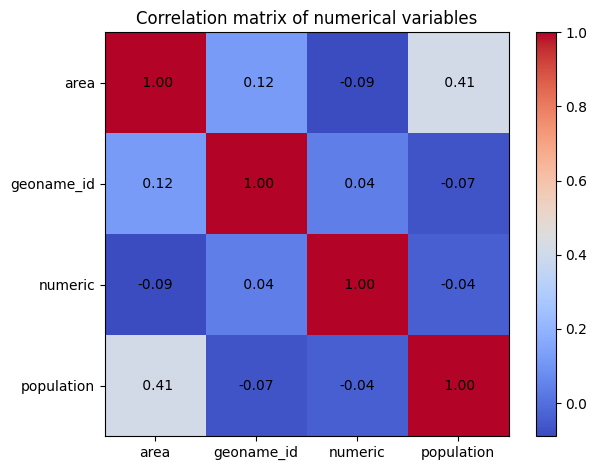

In [86]:
plt.imshow(corr_var, cmap="coolwarm", interpolation="none")
plt.colorbar()

plt.xticks(np.arange(len(corr_var.columns)), corr_var.columns)
plt.yticks(np.arange(len(corr_var.columns)), corr_var.columns)

for i in range(len(corr_var.columns)):
    for j in range(len(corr_var.columns)):
        plt.text(j, i, f"{corr_var.iloc[i, j] : .2f}", ha="center", va="center", color="black")

plt.title("Correlation matrix of numerical variables")
plt.tight_layout()

As it was expected, there is no high correlation of variables, being areas and
population the closest related by a 0.41 metric. As mentioned before, the
higher area allows for a higher population, however due to some countries being
huge area but not being densely populate as the (US, China, Russia, Canada),
the correlation is less than 5.0.

# Population Growth

In [87]:
url_pop = "https://raw.githubusercontent.com/DrueStaples/Population_Growth/master/countries.csv"
df_pop = pd.read_csv(url_pop, sep=",")
df_pop.head()

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


In [88]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     1704 non-null   object
 1   year        1704 non-null   int64 
 2   population  1704 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 40.1+ KB


In [89]:
df_pop_es = df_pop[df_pop["country"] == "Spain"]
df_pop_es.head()

,country,year,population
1416,Spain,1952,28549870
1417,Spain,1957,29841614
1418,Spain,1962,31158061
1419,Spain,1967,32850275
1420,Spain,1972,34513161


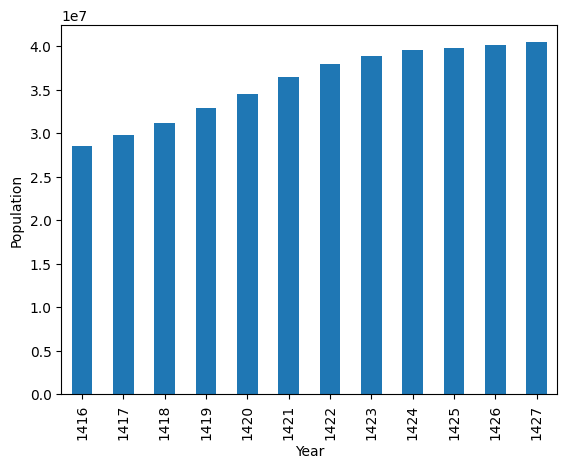

In [90]:
df_pop_es["population"].plot.bar()
plt.xlabel("Year")
plt.ylabel("Population")
plt.show()

In [91]:
df_pop_esar = df_pop[df_pop["country"].isin(["Argentina", "Spain"])]
df_pop_esar.head()

,country,year,population
48,Argentina,1952,17876956
49,Argentina,1957,19610538
50,Argentina,1962,21283783
51,Argentina,1967,22934225
52,Argentina,1972,24779799


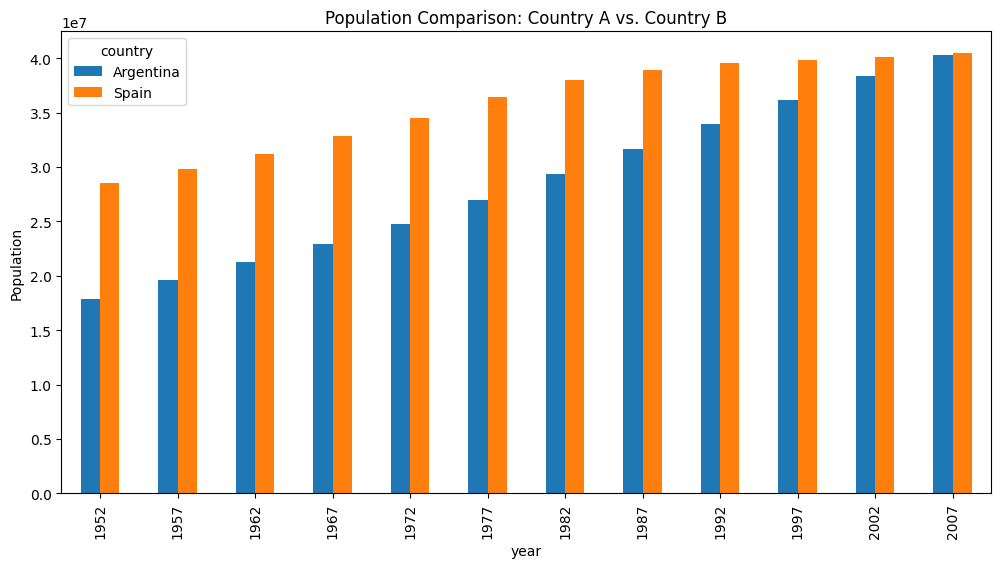

In [92]:
pivoted = df_pop_esar.pivot(index='year', columns='country', values='population')
pivoted.plot.bar(figsize=(12, 6))
plt.title('Population Comparison: Country A vs. Country B')
plt.ylabel('Population')
plt.show()

The graph allows to see the population growth of Spain and Argentina,
while in 1952 the difference is less than half of Spain population, on 2007
that difference decreases by a lot.
It shows how the population growth Argentina experienced was bigger than Spain's

In [97]:
df_es = df[df["languages"].notnull() & df["languages"].str.startswith("es")]
df_es.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 9 to 238
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alpha_2              20 non-null     object 
 1   alpha_3              20 non-null     object 
 2   area                 20 non-null     float64
 3   capital              20 non-null     object 
 4   continent            11 non-null     object 
 5   currency_code        20 non-null     object 
 6   currency_name        20 non-null     object 
 7   eqivalent_fips_code  0 non-null      object 
 8   fips                 20 non-null     object 
 9   geoname_id           20 non-null     int64  
 10  languages            20 non-null     object 
 11  name                 20 non-null     object 
 12  neighbours           20 non-null     object 
 13  numeric              20 non-null     int64  
 14  phone                20 non-null     object 
 15  population           20 non-null     int64  
 

In [99]:
df_es.head(20)

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,NaN,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar
28,BO,BOL,1098580.0,Sucre,SA,BOB,Boliviano,NaN,BL,3923057,"es-BO,qu,ay",Bolivia,"PE,CL,PY,BR,AR",68,591,9947418,NaN,NaN,.bo
45,CL,CHL,756950.0,Santiago,SA,CLP,Peso,NaN,CI,3895114,es-CL,Chile,"PE,BO,AR",152,56,16746491,#######,^(\d{7})$,.cl
48,CO,COL,1138910.0,Bogota,SA,COP,Peso,NaN,CO,3686110,es-CO,Colombia,"EC,PE,PA,BR,VE",170,57,47790000,NaN,NaN,.co
49,CR,CRI,51100.0,San Jose,NaN,CRC,Colon,NaN,CS,3624060,"es-CR,en",Costa Rica,"PA,NI",188,506,4516220,####,^(\d{4})$,.cr
50,CU,CUB,110860.0,Havana,NaN,CUP,Peso,NaN,CU,3562981,es-CU,Cuba,US,192,53,11423000,CP #####,^(?:CP)*(\d{5})$,.cu
60,DO,DOM,48730.0,Santo Domingo,NaN,DOP,Peso,NaN,DR,3508796,es-DO,Dominican Republic,HT,214,+1-809 and 1-829,9823821,#####,^(\d{5})$,.do
62,EC,ECU,283560.0,Quito,SA,USD,Dollar,NaN,EC,3658394,es-EC,Ecuador,"PE,CO",218,593,14790608,@####@,^([a-zA-Z]\d{4}[a-zA-Z])$,.ec
67,ES,ESP,504782.0,Madrid,EU,EUR,Euro,NaN,SP,2510769,"es-ES,ca,gl,eu,oc",Spain,"AD,PT,GI,FR,MA",724,34,46505963,#####,^(\d{5})$,.es
87,GQ,GNQ,28051.0,Malabo,AF,XAF,Franc,NaN,EK,2309096,"es-GQ,fr",Equatorial Guinea,"GA,CM",226,240,1014999,NaN,NaN,.gq
